# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Bello, Antioquia, Colombia**, or **Colombia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Bello, Antioquia, Colombia** to Ann Arbor, USA. In that case at least one source file must be about **Bello, Antioquia, Colombia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Bello, Antioquia, Colombia** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### Title: 
Climatic classification of Emmanuel - Martone in random places in Antioquia, Colombia between 1981 and 2010
### Region and category of data :
Region: Antioquia, Colombia.
Category: Temperature and rainfall.

### Research question:
What climatic relation exists between the temperature and the precipitations in some random places of Antioquia, Colombia between 1981 and 2010? 
### Data access links:

- https://en.wikipedia.org/wiki/Bello,_Antioquia#cite_note-IDEAM1-1

- https://en.wikipedia.org/wiki/Bello,_Antioquia#cite_note-3




In [2]:
#Importamos Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

### Climatic classification of Emmanuel - Martonne:
In 1935 the French climatologist Emmanuel Martonne formulated the following formula for the aridity index:

$$I_{m} = \frac{1}{2} ((\frac{P}{T} + 10) + (12 {\frac{P_{s}}{T_{s} + 10}))}$$

where:
- P (mm) is the total annual precipitation.
- T (° C) is the annual average temperature.
- Ps (mm) is the precipitation of the driest month.
- Ts (° C) is the temperature of the driest month.

So we will use this relationship to classify the climate class of certain places in Antioquia, Colombia, according to the following table:


| Aridity index (IM) |                    Climate Class                   | Symbol |
|:------------------:|:--------------------------------------------------:|:------:|
|      0 to 5.0      |                        Arid                        |    F   |
|     5.1 to 10.0    |                      Semiarid                      |    E   |
|    10.1 to 20.0    |                      Half Damp                     |    D   |
|    20.1 to 35.0    |                        Damp                        |    C   |
|    35.1 to 100.0   |                      Wet rainy                     |    B   |
|  Greater than 100  | Wet rainy, without differences throughout the year |    A   |

- Reference:

Eslava, J. A. Climatología y diversidad climática de Colombia. Rev. Acad, Colomb, Cienc.
18(71): 507-538, 1993. ISSN 0370-3908

http://accefyn.com/revista/Volumen_18/71/508-538.pdf


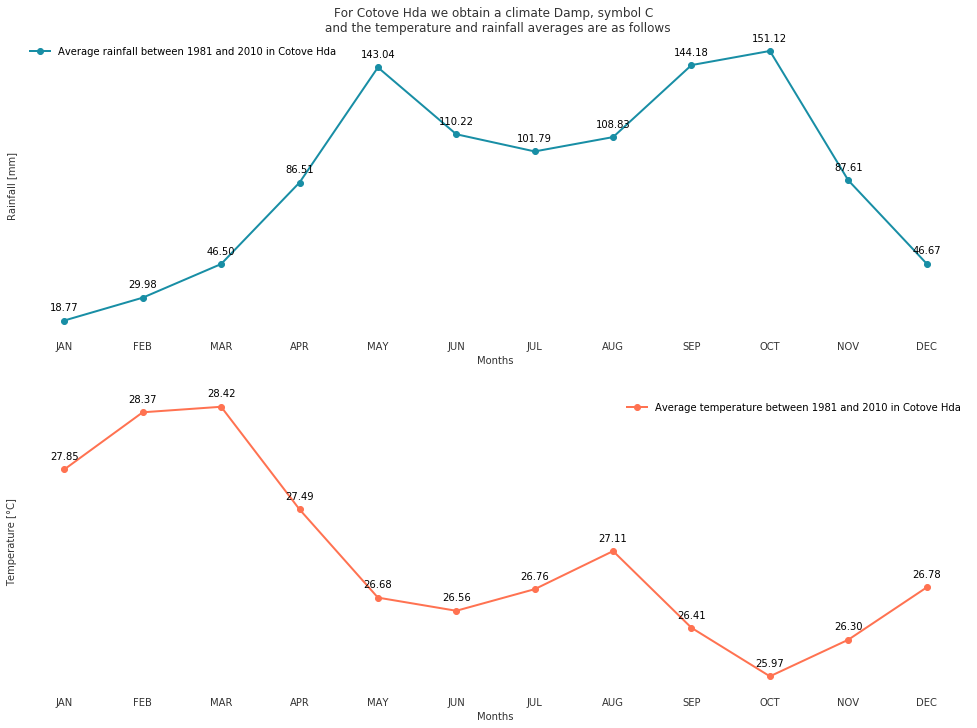

In [148]:
#Datasets
lluvias = pd.read_excel('Promedio_lluvia.xlsx', skiprows = 1)
temperaturas = pd.read_excel('Promedio_temperatura.xlsx',skiprows = 1)
#Los datasets contienen datos de todos los departamentos de colombia, nuestro interés es sólo el departamento de Antioquia
lluvias = lluvias[lluvias['DEPARTAMENTO'] == 'Antioquia']
temperaturas = temperaturas[temperaturas['DEPARTAMENTO'] == 'Antioquia']

#Las columnas de nuestro interés son las variables dadas por Emmanuel Martonne

cols_lluvia = [0,1,3,4,5,6,7,21,22,23,24,25,26,27,28,29,30,31,32,33]
cols_temp = [0,1,3,4,5,6,7,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
lluvias.drop(lluvias.columns[cols_lluvia],axis=1,inplace = True)
temperaturas.drop(temperaturas.columns[cols_temp],axis=1,inplace = True)

lluvias = lluvias.set_index(['NOMBRE'])
temperaturas = temperaturas.set_index(['NOMBRE'])

#Solo nos interesará los lugares(Columna Nombre) que concuerden en cada dataframe

datos = pd.merge(lluvias, temperaturas, how = 'inner', right_index = True, left_index = True)

#Eliminamos además las filas que poseen valores NaN
datos = datos.dropna()

#Seleccionaremos un lugar de forma aleatoria
lugar = datos.sample()


#Creamos una función para el cálculo del índice de aridez dado por Emmanuel Martonne 

#def im(place):
#Precipitación total anual
P = lugar['ANUAL_x'][0]
#Temperatura media anual
T = lugar['ANUAL_y'][0]
#Mes más seco: El mes más seco es aquel donde la precipitación es menor
#Mes_seco 
rain = lugar.iloc[:,0:12]
temp = lugar.iloc[:,13:-1]
Mes_seco_value = rain.min(axis=1)
Mes_seco_name = rain.idxmin(axis=1)
#Precipitación del mes más seco
Ps = Mes_seco_value[0]
#Temperatura del mes más seco
Ts = temp[Mes_seco_name[0][:-2] + '_y'][0]
#Índice de aridez
Im = (1/2)*(((P/T) + 10 ) + ((12*(Ps/(Ts+10)))))

if 0 <= Im <= 5.0:
    _ = 'Arid, symbol F'
elif 5.1 <= Im <= 10.0:
    _ = 'Semiarid, symbol E'
elif 10.1 <= Im <= 20.0:
    _ = 'Half Damp, symbol D'
elif 20.1 <= Im <= 35.0:
    _ = 'Damp, symbol C'
elif 35.1 <= Im <= 100.0:
    _ = 'Wet rainy, symbol B'
else :
    _ ='Wet rainy, without differences throughout the year, symbol A'
#return _
#im(lugar)

'''Nuestro interés será gráficar el comportamiento en el tiempo de la temperatura y las precipitaciones 
   en un lugar de antioquia y a su vez colocar su clasificación climática de acuerdo a Emmanuel - Martonne'''

plt.figure(figsize=(17,12))
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
pos = np.arange(len(months))
ax1 = plt.subplot(2,1,1)
plt.plot(rain.values[0], '-o',linewidth=2, label = 'Average rainfall between 1981 and 2010 in {}'.format(rain.index[0]), color ='#188ea5')
plt.xticks(pos, months, alpha=0.8)
plt.ylabel('Rainfall [mm]', alpha=0.8)
plt.legend(frameon = False)
plt.xlabel('Months', alpha=0.8)
plt.title('For {} we obtain a climate {} \n and the temperature and rainfall averages are as follows'.format(rain.index[0], _ ), alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
for x,y in enumerate(rain.values[0]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


ax2 = plt.subplot(2,1,2)
plt.plot(temp.values[0], '-o',linewidth=2, label = 'Average temperature between 1981 and 2010 in {}'.format(rain.index[0]), color = '#ff7251')
plt.xticks(pos, months, alpha=0.8)
plt.ylabel('Temperature [°C]', alpha=0.8)
plt.xlabel('Months', alpha=0.8)
plt.legend(frameon = False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for x,y in enumerate(temp.values[0]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('Image', bbox_inches = 'tight')
plt.show()
